## Real Time Sign Classification

In [1]:
import numpy as np
import os
import cv2
import imutils

import keras
from keras.preprocessing.image import img_to_array

Импорт обученной модели:

In [2]:
alphabet=['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']
model = keras.models.load_model("my_model")

Построение прогноза с помощью обученной модели: 

In [3]:
def classify(image):
    image = cv2.resize(image, (28, 28))
    image = image.astype("float") / 255.0
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    proba=model.predict(image)
    idx = np.argmax(proba)
    return alphabet[idx]

Подключение к камере, обработка и распознавание изображений, построение предсказаний:

In [4]:
cap = cv2.VideoCapture(0)
while 1:
    
    # открытие алфавита
    image = cv2.imread('amer_sign2.png')
    cv2.imshow("image", image)
 
    # получение изображения с камеры
    ret, img = cap.read()
    img = cv2.flip(img, 1)
    
    # задание параметров и отрисовка области обработки жестов
    top, right, bottom, left = 25, 950, 225, 1150
    cv2.rectangle(img, (left, top), (right, bottom), (255, 255, 0), 2)

    # вырезаем область изображения с жестом
    roi = img[top:bottom, right:left]

    # зеркальное отображение изображение фрагмента
    roi=cv2.flip(roi,1)
    
    # изменение цветового простанства
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    
    # использование размытия
    gray = cv2.GaussianBlur(gray, (7, 7), 0)
    
    # визуализация обработанного фрагмента изображения
    cv2.imshow('roi', gray)
    
    # распознавание жеста 
    alpha=classify(gray)
    
    # отображение распознанной буквы
    font=cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img,alpha,(800,130),font,5,(255, 255, 0),2)
    cv2.imshow('img',img)
    key = cv2.waitKey(500) & 0xFF
    
    if key==ord('q'):
        break;
cap.release()
cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()

Пример работы:

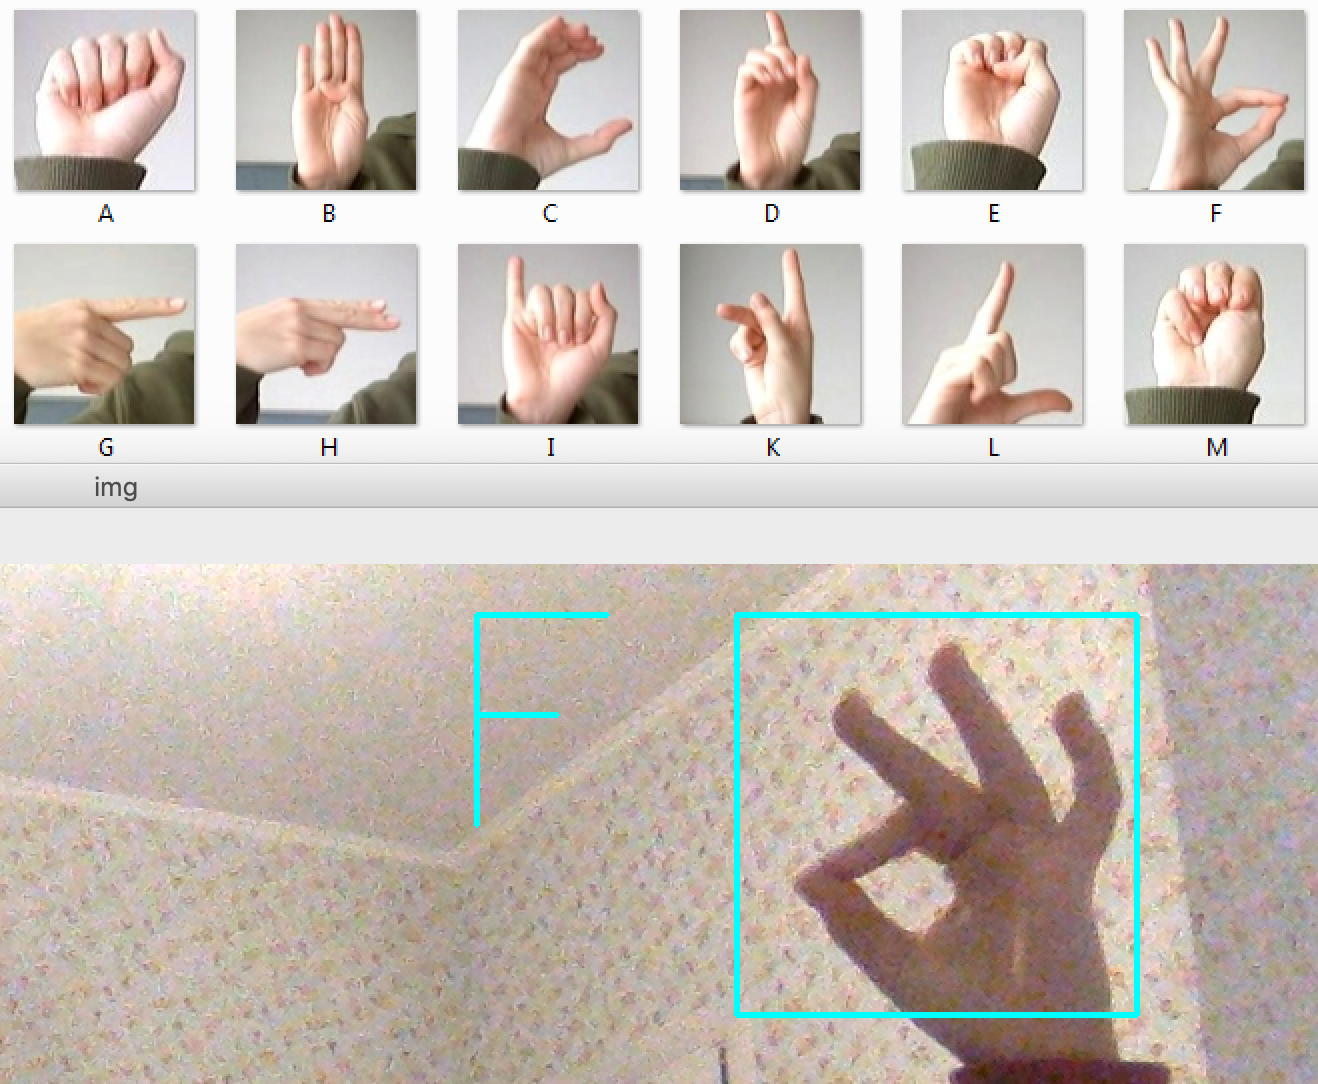